Libraries and Dataset

In [11]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dataset
file_path ="final_data.csv"
data = pd.read_csv(file_path)

# Menampilkan 5 data teratas
data.head()

,Fat,Caloric Value,Protein,Vitamin B2,Zinc,Vitamin B3,Iron,Phosphorus,Vitamin B1,Vitamin B5,Potassium,Magnesium,Calcium,Vitamin B6,Fats category
0,0.525154,-0.545865,-0.783925,0.136054,-0.975762,-0.956376,-1.036691,-1.357450,-0.534351,-0.897209,-0.880444,-1.494816,-1.361448,-0.241636,Moderate fats
1,1.273715,0.494411,0.511160,0.164306,0.429390,-0.715417,-0.988253,0.619481,0.241307,0.408775,0.115237,-0.049408,1.129002,-0.385940,High fats
2,0.316654,-0.571698,-0.838223,-1.108980,-1.127832,-1.162341,-1.278404,-1.389491,-1.061099,-1.154499,-1.830420,-1.512822,-1.365888,-1.163423,Low fats
3,-0.061433,-0.875474,-0.518231,-0.686236,-0.990749,-1.058034,-0.996220,-1.380782,-0.744215,-1.071604,-0.596099,-1.450942,-1.314331,-1.081800,Low fats
4,0.027751,-0.875474,-0.639961,-0.700666,-0.924340,-0.965522,-1.253168,-0.116291,0.049178,-0.687928,-0.512859,-0.987048,0.351474,-1.128114,Low fats


EDA




Data Info:
Null values:
 Fat              0
Caloric Value    0
Protein          0
Vitamin B2       0
Zinc             0
Vitamin B3       0
Iron             0
Phosphorus       0
Vitamin B1       0
Vitamin B5       0
Potassium        0
Magnesium        0
Calcium          0
Vitamin B6       0
Fats category    0
dtype: int64

Data types:
 Fat              float64
Caloric Value    float64
Protein          float64
Vitamin B2       float64
Zinc             float64
Vitamin B3       float64
Iron             float64
Phosphorus       float64
Vitamin B1       float64
Vitamin B5       float64
Potassium        float64
Magnesium        float64
Calcium          float64
Vitamin B6       float64
Fats category     object
dtype: object

Summary statistics:
                Fat  Caloric Value       Protein    Vitamin B2          Zinc  \
count  2395.000000   2.395000e+03  2.395000e+03  2.395000e+03  2.395000e+03   
mean      0.000000  -2.017407e-16  1.661394e-16  2.966776e-17 -2.254749e-16   
std       1.00

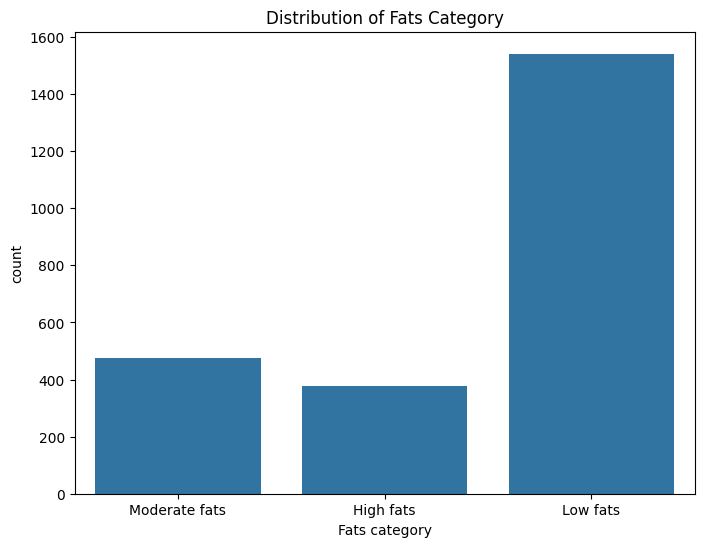

In [12]:
# Mengechek Nilai Kosong (Null Values) dan Tipe Data
print("\nData Info:")
print("Null values:\n", data.isnull().sum())
print("\nData types:\n", data.dtypes)

# Ringkasan Statistik
print("\nSummary statistics:\n", data.describe())

# Visualisasi Distribusi Kategori Lemak
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Fats category', data=data)
plt.title('Distribution of Fats Category')
plt.show()

Data Preprocessing

In [13]:
# Handle missing values (if any)
data = data.dropna()

# Encode categorical variables (already encoded in the dataset)

# Separate features and target variable
# Drop the 'Fats category' column to use the remaining columns as features
X = data.drop(['Fats category'], axis=1)

# Encode the target variable (e.g., 'Low fats' as True, others as False)
y = data['Fats category'] == 'Low fats'

# Normalize/scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split Dataset (Traning test and Testing test)


In [14]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 1676 samples
Testing set size: 719 samples


Train a Machine Learning Model

In [15]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


Evaluate the Model

In [16]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


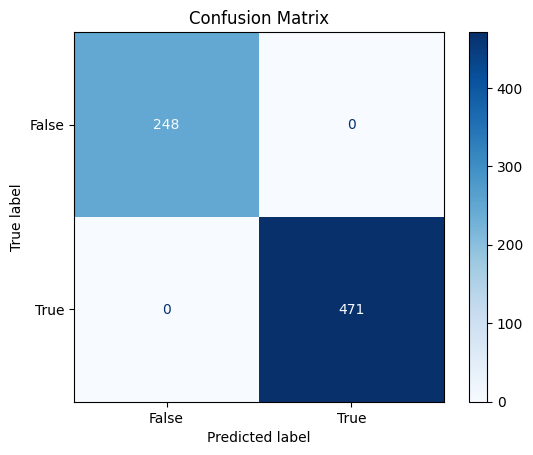

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [17]:
# Import confusion matrix and display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Pickle Model


In [18]:
import pickle

# Save the trained model to a file 'mlModel.pkl'
model_filename = "mlModel.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")

Model saved to mlModel.pkl
